## ODEs (Differential Equations.jl)

[DifferentialEquations.jl](https://docs.sciml.ai/DiffEqDocs/stable/getting_started/) is one of the main selling points of using Julia. For a comparison with packages in other languages see [this blog post](https://www.stochasticlifestyle.com/comparison-differential-equation-solver-suites-matlab-r-julia-python-c-fortran/), and why you should not write your own solver see [this](https://nextjournal.com/ChrisRackauckas/why-you-shouldnt-use-eulers-method-to-solve-odes). For benchmarks comparing differential equations packages in multiple languages see [this](https://docs.sciml.ai/SciMLBenchmarksOutput/stable/MultiLanguage/ode_wrapper_packages/). The benchmarks show that the solvers in DifferentialEquations.jl are better.

In [1]:
using DifferentialEquations
using Plots

using Pkg
Pkg.add("DifferentialEquations")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


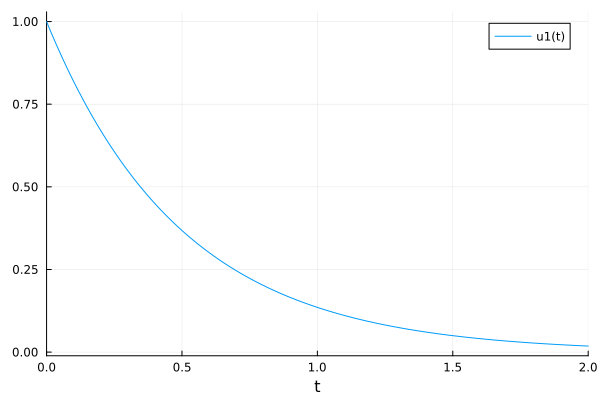

In [2]:
function simple_ode(dy, y, p, t)
    dy[1] = -2 * y[1]
end

y₀ = [1.0]
tspan = (0.0, 2.0)
prob = ODEProblem(simple_ode, y₀, tspan)

sol = solve(prob)

plot(sol)

#### Solving Lorenz
Example 2 in the [docs](https://docs.sciml.ai/DiffEqDocs/stable/getting_started/)
$$
dx/dt = \sigma(y-x) \\
dy/dt = x(\rho-z) - y \\
dz/dt = xy - \beta*z \\
$$

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


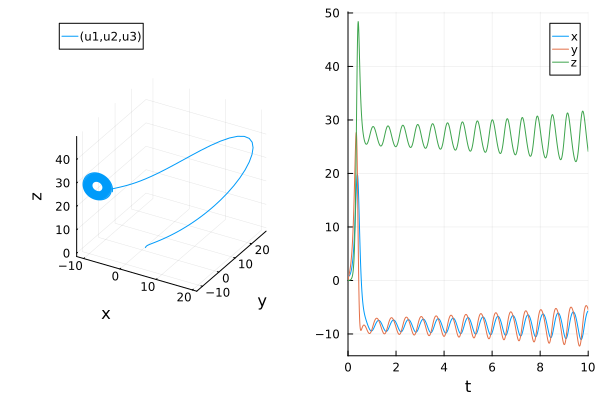

In [3]:
function lorenz!(du, u, p, t)
    σ, ρ, β = p
    du[1] = σ * (u[2] - u[1])
    du[2] = u[1] * (ρ - u[3]) - u[2]
    du[3] = u[1] * u[2] - β * u[3]
end
u₀ = [1.0, 0.0, 0.0]
tspan = (0.0, 10.0)
p = (10.0, 28.0, 8/3)
prob = ODEProblem(lorenz!, u₀, tspan, p)

sol = solve(prob)

plot1 = plot(sol, 
             vars = (1,2,3), 
             xlabel="x",  
             ylabel="y", 
             zlabel="z",)
plot2 = plot(sol, label = ["x" "y" "z"])
plot(plot1, plot2, layout = (1, 2))

Let's solve this in Float16 now as promised below. This doesn't require much modification!

In [4]:
u0 = Float16[1.0, 0.0, 3.0]
tspan = Float16[0.0, 10.0]
p = Float16[10.0, 28.0, 8/3]
prob = ODEProblem(lorenz!, u₀, tspan, p)
sol = solve(prob);

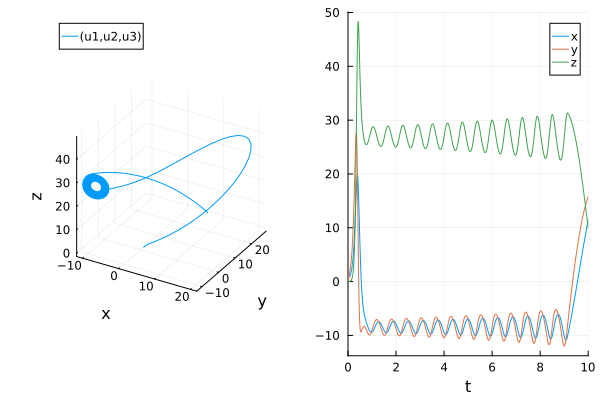

In [5]:
plot1 = plot(sol, 
             vars = (1,2,3), 
             xlabel="x",  
             ylabel="y", 
             zlabel="z",)
plot2 = plot(sol, label = ["x" "y" "z"])
plot(plot1, plot2, layout = (1, 2))

## Optimization (Optim.jl)
If you want constrained optimization see [JuMP](https://jump.dev/JuMP.jl/stable/should_i_use/) (Which I have no experience with). 

In [21]:
# install package first
using Pkg
Pkg.add("Optim")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`


  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


### Example
modified from [here](https://julianlsolvers.github.io/Optim.jl/stable/#user/minimization/)

In [25]:
"""
    rosenbrock(x, y)

Rosenbrock function. (Also this is how documentation is written)
"""
rosenbrock(x) = (1.0 - x[1])^2 + 100. * (x[2] - x[1]^2)^2


rosenbrock

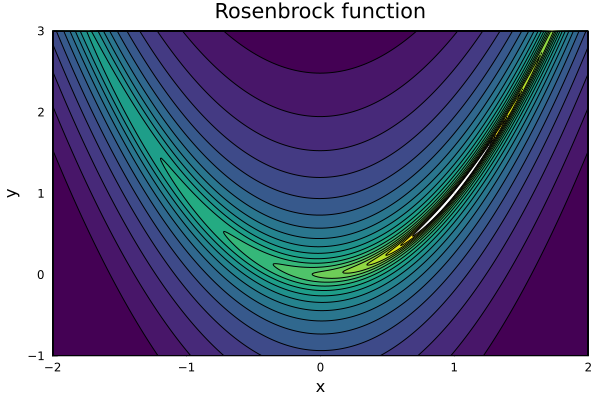

In [27]:
using Plots
ros(x, y) = rosenbrock([x, y])
x = -2:0.01:2
y = -1:0.01:3
# contour plot with log contours
contour(x, y, ros,
        fill = true, 
        fillcolor = cgrad(:viridis, rev = true), 
        levels = 10 .^ range(-1, stop = 3, length = 20),
        legend = false, 
        colorbar = false, 
        xlabel = "x", 
        ylabel = "y", 
        title = "Rosenbrock function")

You can see the minimum at 1.0, 1.0

In [28]:
using Optim

Optimize using NelderMead

In [33]:
res = optimize(rosenbrock, [0.0, 0.0], NelderMead())

 * Status: success

 * Candidate solution
    Final objective value:     3.525527e-09

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    60
    f(x) calls:    117


In [38]:
res = optimize(rosenbrock, [0.0, 0.0], NewtonTrustRegion())

 * Status: success

 * Candidate solution
    Final objective value:     5.382873e-17

 * Found with
    Algorithm:     Newton's Method (Trust Region)

 * Convergence measures
    |x - x'|               = 7.52e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 7.52e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.64e-13 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.90e+03 ≰ 0.0e+00
    |g(x)|                 = 4.50e-11 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    15
    f(x) calls:    16
    ∇f(x) calls:   16
    ∇²f(x) calls:  15


In [41]:
resultvec = res.minimizer

2-element Vector{Float64}:
 0.9999999926631935
 0.9999999853262589

For more info look at [Optim docs](https://julianlsolvers.github.io/Optim.jl/stable/#algo/precondition/#example)